In [1]:
import re
import math
from collections import Counter
import matplotlib.pyplot as plt 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [2]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\swoye\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\swoye\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
text = """Pirates are evil? The Marines are righteous?
These terms have always changed throughout
the course of history. Kids who have never known
peace and kids who have never known war have
different values. Those who stand at the top
determine what's wrong and what's right! Justice
will prevail, you say? But of course it will...
Whoever wins this war becomes justice!"""

stop_words = set(stopwords.words('english'))
tokens = re.findall(r'\b\w+\b', text.lower())

tokens = [token for token in tokens if token not in stop_words]


ZIPF'S LAW

In [4]:
freq = Counter(tokens)
sorted_items = sorted(freq.items(), key = lambda x: x[1], reverse = True)
words, freqs = zip(*sorted_items)
ranks = range(1, len(freqs) + 1)

HEAP'S LAW

In [5]:
vocab = set()
vocab_size = []
token_counts = []

for i, word in enumerate(tokens, 1):
    vocab.add(word)
    vocab_size.append(len(vocab))
    token_counts.append(i)

PLOTTING

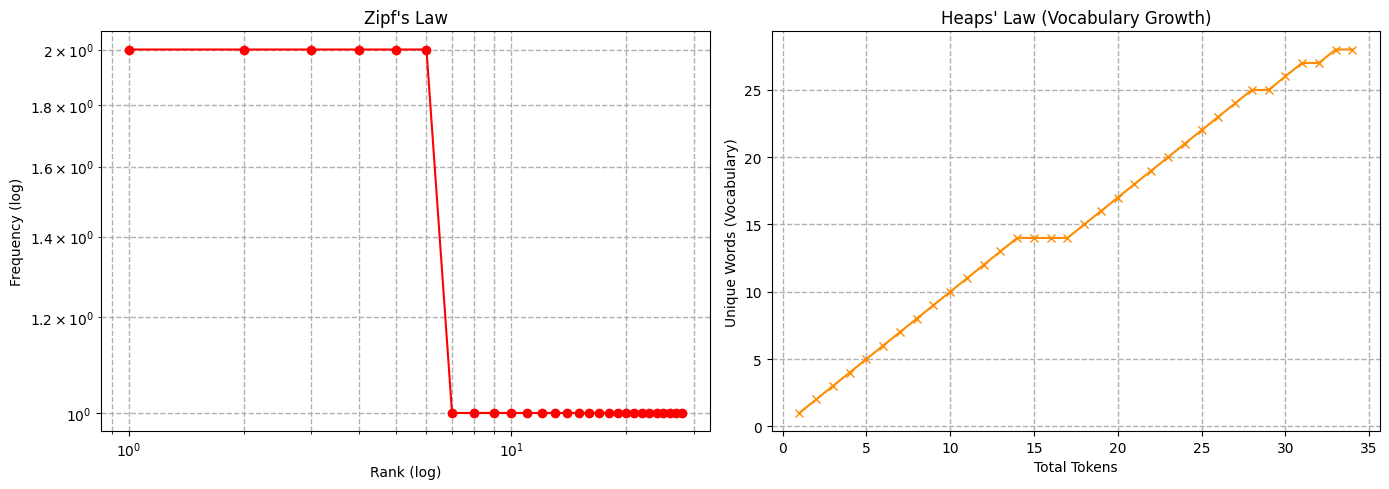

In [6]:
# Plot both in subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Zipf’s Law Plot
axs[0].loglog(ranks, freqs, marker='o', color='red')
axs[0].set_title("Zipf's Law")
axs[0].set_xlabel("Rank (log)")
axs[0].set_ylabel("Frequency (log)")
axs[0].grid(True, which='both', linestyle='--', linewidth=1)

# Heaps’ Law Plot
axs[1].plot(token_counts, vocab_size, marker='x', color='darkorange')
axs[1].set_title("Heaps' Law (Vocabulary Growth)")
axs[1].set_xlabel("Total Tokens")
axs[1].set_ylabel("Unique Words (Vocabulary)")
axs[1].grid(True, linestyle='--', linewidth=1)

plt.tight_layout()
plt.show()